In [51]:
import random 
import numpy as np 
import pandas as pd
from numpy import mean
from numpy import std
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler
from IPython.display import display
from sklearn.cluster import KMeans 
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import homogeneity_score, completeness_score, \
v_measure_score, adjusted_rand_score, adjusted_mutual_info_score, silhouette_score
%matplotlib inline

#plotly imports
import plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

np.random.seed(123)

In [52]:
df = pd.read_csv('Live_Preprocessed.csv')
df.shape

(7050, 12)

In [53]:
X = df.copy(deep=True)
X.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,-0.094957,-1.245993,-0.233666,1.421466,1.803657,2.412971,1.260807,2.409736,2.157876,1.123701,3.257990,-0.252646
1,-0.094957,0.802573,-0.233666,-0.703499,-0.972478,-0.651395,0.598128,-0.649914,-0.532052,-0.411476,-0.306938,-0.252646
2,-0.094957,-1.245993,-0.233666,1.421466,1.460119,1.584526,0.790448,1.520878,0.812912,1.123701,-0.306938,-0.252646
3,-0.094957,0.802573,-0.233666,-0.703499,-0.972478,-0.651395,0.410180,-0.649914,-0.532052,-0.411476,-0.306938,-0.252646
4,-0.094957,0.802573,-0.233666,-0.703499,-0.972478,-0.651395,0.790448,0.967156,-0.532052,-0.411476,-0.306938,-0.252646


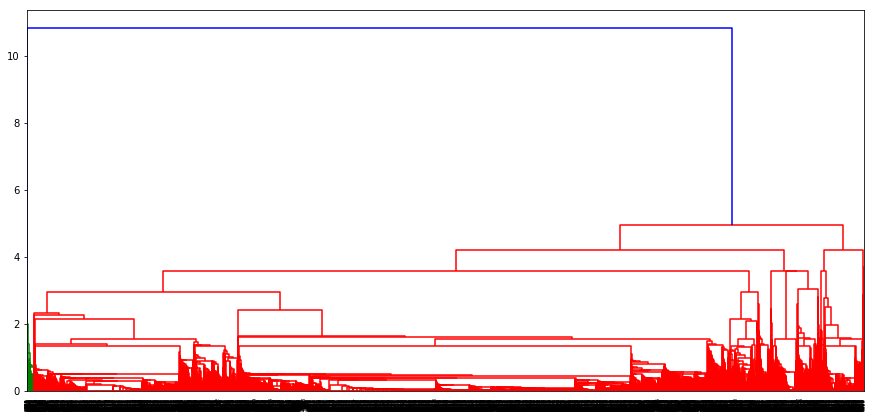

In [9]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

linked = linkage(X, 'single')

labelList = range(1, 7051)

plt.figure(figsize=(15, 7))
dendrogram(linked,
            orientation='top',
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()

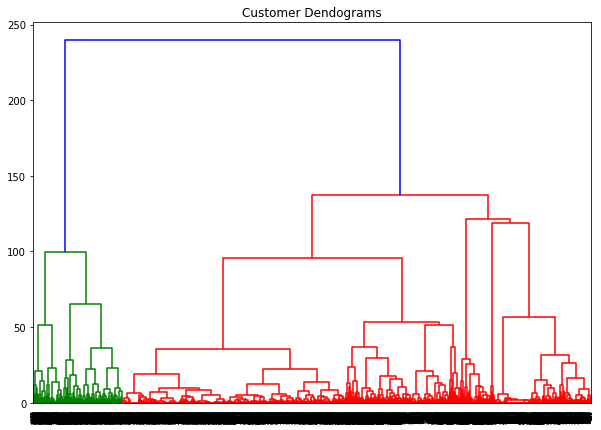

In [54]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("Customer Dendograms")
dend = shc.dendrogram(shc.linkage(df, method='ward'))
# plt.axhline(y=6, color='r', linestyle='--')

In [55]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
clus = cluster.fit_predict(X)

In [56]:
import numpy as np
np.set_printoptions(threshold=np.inf)

In [57]:
print(cluster.labels_)

[1 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1
 0 0 1 1 0 1 1 0 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 0 1 0 1 0 0 1 1 1 1 0 1 1 1
 1 0 1 0 1 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 1 0 0 1 1 0 0 1 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0
 1 1 0 1 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0
 0 0 1 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0
 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 1
 0 1 0 1 0 1 0 0 0 0 1 0 

In [58]:
old_df = pd.read_csv('Live.csv')
old_df.tail()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
7045,1050855161656896_1061863470556065,photo,9/24/2016 2:58,89,0,0,89,0,0,0,0,0,NaN,NaN,NaN,NaN
7046,1050855161656896_1061334757275603,photo,9/23/2016 11:19,16,0,0,14,1,0,1,0,0,NaN,NaN,NaN,NaN
7047,1050855161656896_1060126464063099,photo,9/21/2016 23:03,2,0,0,1,1,0,0,0,0,NaN,NaN,NaN,NaN
7048,1050855161656896_1058663487542730,photo,9/20/2016 0:43,351,12,22,349,2,0,0,0,0,NaN,NaN,NaN,NaN
7049,1050855161656896_1050858841656528,photo,9/10/2016 10:30,17,0,0,17,0,0,0,0,0,NaN,NaN,NaN,NaN


In [69]:
old_df[:10]

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN
5,246675545449582_1645650162218773,photo,4/18/2018 2:14,217,6,0,211,5,1,0,0,0,NaN,NaN,NaN,NaN
6,246675545449582_1645564175560705,video,4/18/2018 0:24,503,614,72,418,70,10,2,0,3,NaN,NaN,NaN,NaN
7,246675545449582_1644824665634656,video,4/17/2018 7:42,295,453,53,260,32,1,1,0,1,NaN,NaN,NaN,NaN
8,246675545449582_1644655795651543,photo,4/17/2018 3:33,203,1,0,198,5,0,0,0,0,NaN,NaN,NaN,NaN
9,246675545449582_1638788379571618,photo,4/11/2018 4:53,170,9,1,167,3,0,0,0,0,NaN,NaN,NaN,NaN


In [59]:
old_df.status_type.unique()

array(['video', 'photo', 'link', 'status'], dtype=object)

In [71]:
#Add the cluster vector to our DataFrame, X
X["Cluster"] = clus


In [74]:
old_df["Cluster"] = clus
old_df[35:45]

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4,Cluster
35,246675545449582_1599393216844468,photo,3/5/2018 2:48,293,8,0,281,11,1,0,0,0,NaN,NaN,NaN,NaN,0
36,246675545449582_1596564337127356,video,3/2/2018 9:55,128,137,26,110,16,2,0,0,0,NaN,NaN,NaN,NaN,1
37,246675545449582_1594428064007650,photo,2/28/2018 8:19,84,15,13,78,5,1,0,0,0,NaN,NaN,NaN,NaN,0
38,246675545449582_1594137564036700,photo,2/28/2018 1:43,66,11,6,61,4,1,0,0,0,NaN,NaN,NaN,NaN,0
39,246675545449582_1592459934204463,video,2/26/2018 8:50,171,292,28,150,19,1,1,0,0,NaN,NaN,NaN,NaN,1
40,246675545449582_1591545580962565,video,2/25/2018 10:13,90,72,23,79,10,1,0,0,0,NaN,NaN,NaN,NaN,1
41,246675545449582_1587015831415540,video,2/21/2018 0:19,139,39,9,121,16,1,1,0,0,NaN,NaN,NaN,NaN,0
42,246675545449582_1585003828283407,video,2/19/2018 0:11,236,181,21,201,33,0,1,0,1,NaN,NaN,NaN,NaN,1
43,246675545449582_1584252028358587,video,2/18/2018 7:15,225,210,34,193,30,0,2,0,0,NaN,NaN,NaN,NaN,1
44,246675545449582_1583900568393733,photo,2/17/2018 22:30,275,12,0,260,11,4,0,0,0,NaN,NaN,NaN,NaN,0


In [61]:
#plotX is a DataFrame containing 5000 values sampled randomly from X
# plotX = pd.DataFrame(np.array(X.sample(5000)))
plotX = pd.DataFrame(np.array(X))

#Rename plotX's columns since it was briefly converted to an np.array above
plotX.columns = X.columns

In [62]:
#PCA with one principal component
pca_1d = PCA(n_components=1)

#PCA with two principal components
pca_2d = PCA(n_components=2)

#PCA with three principal components
pca_3d = PCA(n_components=3)

In [63]:
#This DataFrame holds that single principal component mentioned above
PCs_1d = pd.DataFrame(pca_1d.fit_transform(plotX.drop(["Cluster"], axis=1)))

#This DataFrame contains the two principal components that will be used
#for the 2-D visualization mentioned above
PCs_2d = pd.DataFrame(pca_2d.fit_transform(plotX.drop(["Cluster"], axis=1)))

#And this DataFrame contains three principal components that will aid us
#in visualizing our clusters in 3-D
PCs_3d = pd.DataFrame(pca_3d.fit_transform(plotX.drop(["Cluster"], axis=1)))

In [64]:
PCs_1d.columns = ["PC1_1d"]

#"PC1_2d" means: 'The first principal component of the components created for 2-D visualization, by PCA.'
#And "PC2_2d" means: 'The second principal component of the components created for 2-D visualization, by PCA.'
PCs_2d.columns = ["PC1_2d", "PC2_2d"]

PCs_3d.columns = ["PC1_3d", "PC2_3d", "PC3_3d"]

In [65]:
plotX = pd.concat([plotX,PCs_1d,PCs_2d,PCs_3d], axis=1, join='inner')


In [66]:
plotX["dummy"] = 0


In [67]:
#Note that all of the DataFrames below are sub-DataFrames of 'plotX'.
#This is because we intend to plot the values contained within each of these DataFrames.

cluster0 = plotX[plotX["Cluster"] == 0]
cluster1 = plotX[plotX["Cluster"] == 1]
# cluster2 = plotX[plotX["Cluster"] == 2]

In [75]:
#Instructions for building the 2-D plot

#trace1 is for 'Cluster 0'
trace1 = go.Scatter(
                    x = cluster0["PC1_2d"],
                    y = cluster0["PC2_2d"],
                    mode = "markers",
                    name = "Cluster 0",
                    marker = dict(color = 'rgba(255, 128, 255, 0.8)'),
                    text = None)

#trace2 is for 'Cluster 1'
trace2 = go.Scatter(
                    x = cluster1["PC1_2d"],
                    y = cluster1["PC2_2d"],
                    mode = "markers",
                    name = "Cluster 1",
                    marker = dict(color = 'rgba(255, 128, 2, 0.8)'),
                    text = None)

#trace3 is for 'Cluster 2'
# trace3 = go.Scatter(
#                     x = cluster2["PC1_2d"],
#                     y = cluster2["PC2_2d"],
#                     mode = "markers",
#                     name = "Cluster 2",
#                     marker = dict(color = 'rgba(0, 255, 200, 0.8)'),
#                     text = None)

# data = [trace1, trace2, trace3]
data = [trace1, trace2]

title = "Visualizing Clusters in Two Dimensions Using PCA"

layout = dict(title = title,
              xaxis= dict(title= 'PC1',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'PC2',ticklen= 5,zeroline= False)
             )

fig = dict(data = data, layout = layout)

iplot(fig)

In [76]:
from sklearn.metrics import silhouette_score
silhouette_score(df, cluster.labels_)

0.4914762982341604